## Importing Libararies and Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer

from plotly.offline import iplot
import plotly as py
import plotly.tools as tls

import pickle

## Data Preparation and Data Exploration

In [2]:
# Read in dataset
heartdata = pd.read_csv('heart.csv')
heartdata.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Display dataset
heartdata

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
# Shape of the dataset
heartdata.shape

(303, 14)

In [5]:
heartdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
# Descriptive statistics for each column
heartdata.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
# Check null values
sum(heartdata.isnull().sum())

0

In [8]:
heartdata.isna()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
heartdata.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [10]:
heartdata['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

In [11]:
#Percentage of patients have and do not have heart attack risk
heartdata['output'].value_counts()/heartdata.shape[0]*100 

1    54.455446
0    45.544554
Name: output, dtype: float64

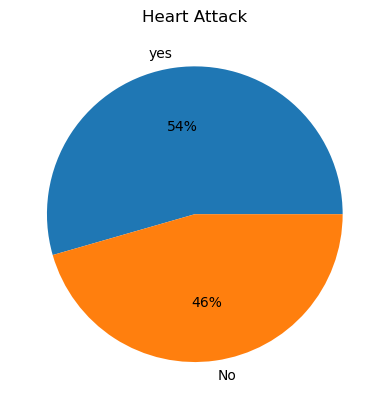

In [12]:
# Create a plot to display the percentage of the positive and negative heart attack 
labels = ['yes', 'No']
values = heartdata['output'].value_counts().values

plt.pie(values, labels=labels, autopct='%1.0f%%')
plt.title('Heart Attack')
plt.show()


## Attributes Correlation

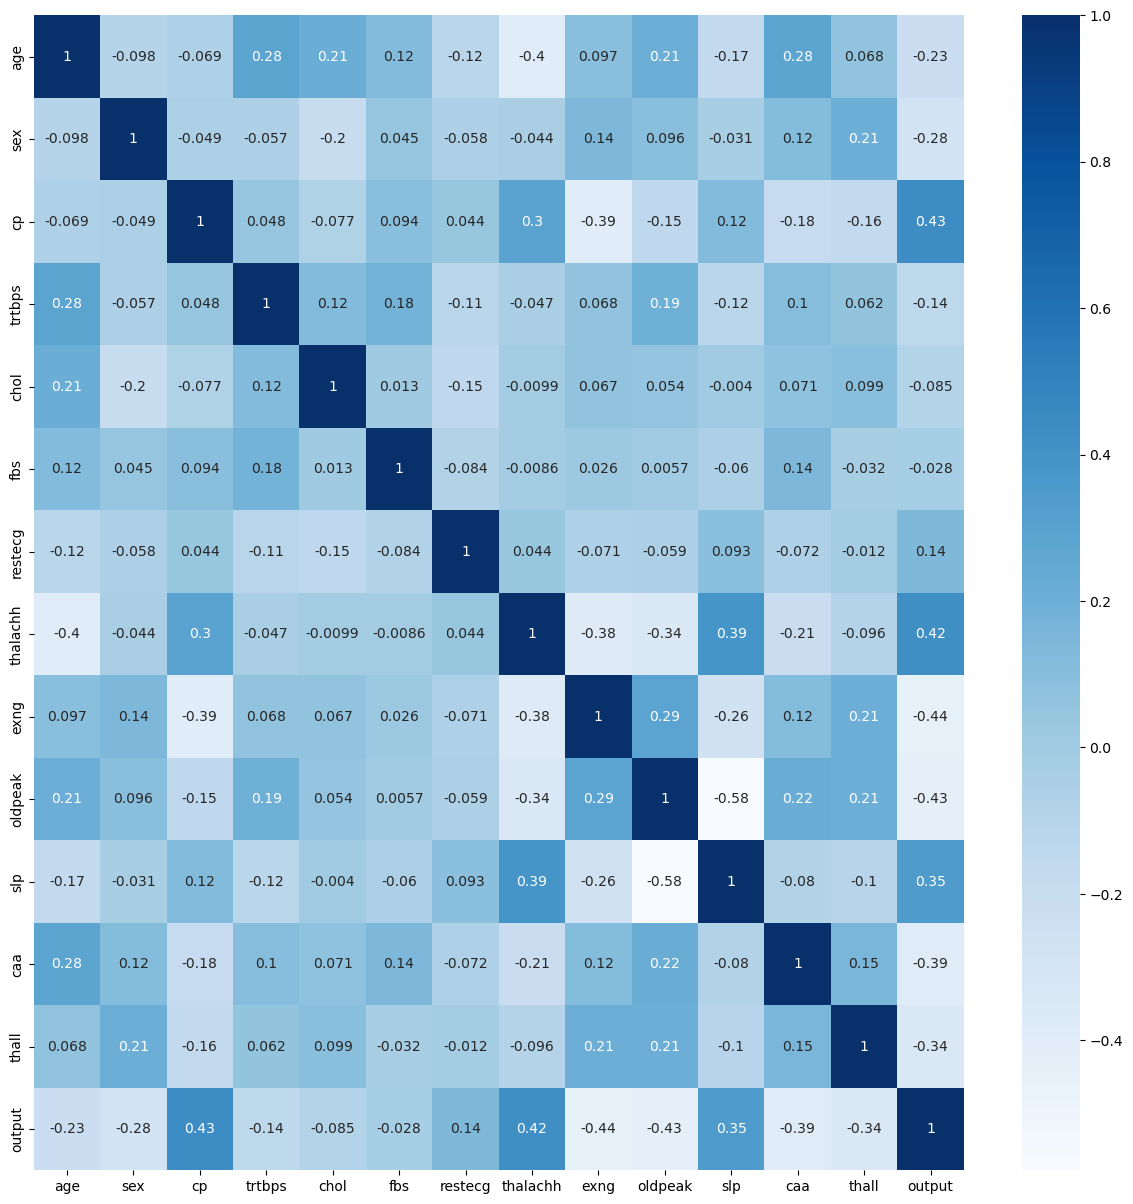

In [13]:
# Correlation map
plt.figure(figsize=(15, 15))
sns.heatmap(heartdata.corr(), annot = True, cmap = "Blues")
plt.show()

## Age Exploration

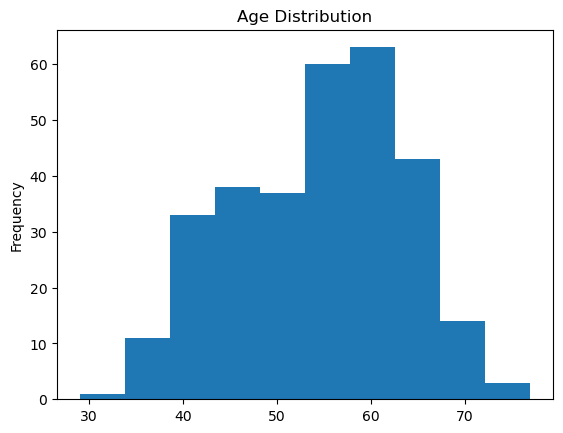

In [14]:
# Display age distribution
heartdata['age'].plot(kind = 'hist', title = 'Age Distribution')
plt.show()

In [15]:
# Get min, max and average of the age
print('Min age: ', min(heartdata['age']))
print('Max age: ', max(heartdata['age']))
print('Average age: ', heartdata['age'].mean())

Min age:  29
Max age:  77
Average age:  54.366336633663366


C:\Users\ASUS\AppData\Local\Temp\ipykernel_4532\2468506180.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\ASUS\AppData\Local\Temp\ipykernel_4532\2468506180.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




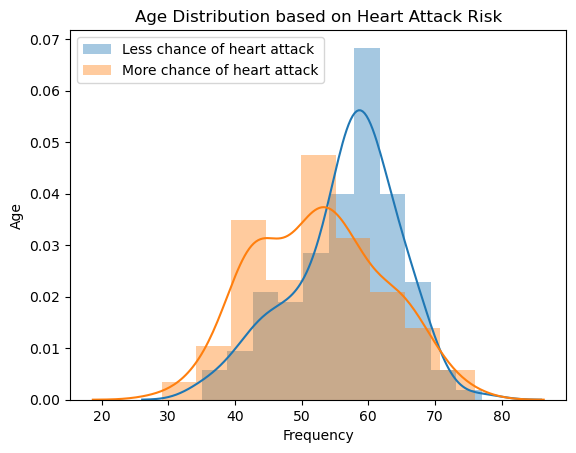

In [16]:
# Display age distribution based on heart attack
sns.distplot(heartdata[heartdata['output'] == 0]['age'], label='Less chance of heart attack')
sns.distplot(heartdata[heartdata['output'] == 1]['age'], label = 'More chance of heart attack')
plt.xlabel('Frequency')
plt.ylabel('Age')
plt.title('Age Distribution based on Heart Attack Risk')
plt.legend()
plt.show()

In [17]:
# Get min, max and average of the age of the people have less chance of heart attack
print('Min age of people who less chance of heart attack: ', min(heartdata[heartdata['output'] == 0]['age']))
print('Max age of people who less chance of heart attack: ', max(heartdata[heartdata['output'] == 0]['age']))
print('Average age of people who less chance of heart attack: ', heartdata[heartdata['output'] == 0]['age'].mean())

Min age of people who less chance of heart attack:  35
Max age of people who less chance of heart attack:  77
Average age of people who less chance of heart attack:  56.60144927536232


In [18]:
# Get min, max and average of the age of the people more chance of heart attack
print('Min age of people who more chance of heart attack: ', min(heartdata[heartdata['output'] == 1]['age']))
print('Max age of people who more chance of heart attack: ', max(heartdata[heartdata['output'] == 1]['age']))
print('Average age of people who more chance of heart attack: ', heartdata[heartdata['output'] == 1]['age'].mean())

Min age of people who more chance of heart attack:  29
Max age of people who more chance of heart attack:  76
Average age of people who more chance of heart attack:  52.4969696969697


## Gender Exploration

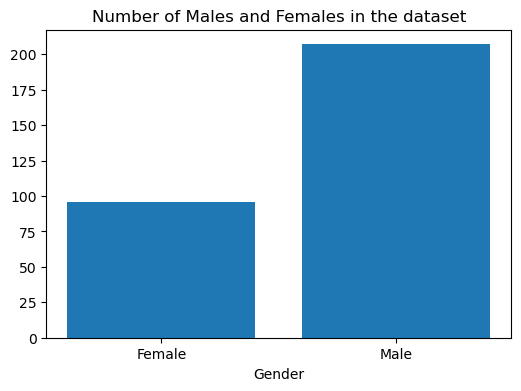

In [19]:
# Number of males and females
F = heartdata[heartdata['sex'] == 0].count()['output']
M = heartdata[heartdata['sex'] == 1].count()['output']

# Create a plot
figure, ax = plt.subplots(figsize = (6, 4))
ax.bar(x = ['Female', 'Male'], height = [F, M])
plt.xlabel('Gender')
plt.title('Number of Males and Females in the dataset')
plt.show()

## Chest Pain Type Exploration

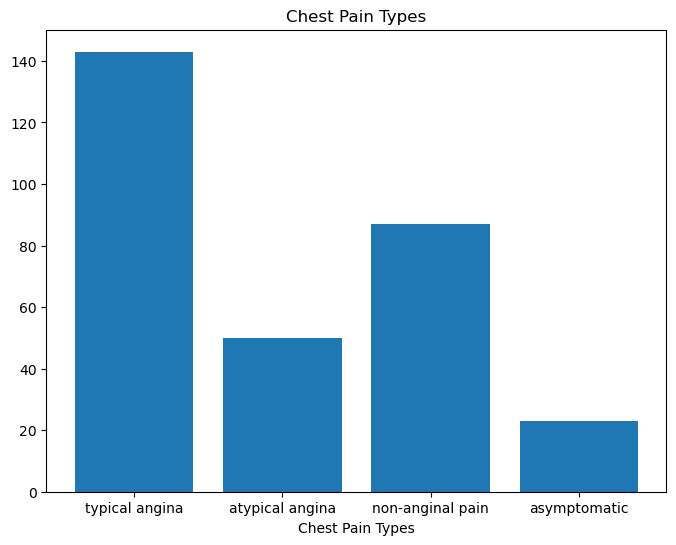

In [20]:
ta = heartdata[heartdata['cp'] == 0].count()['output']
aa = heartdata[heartdata['cp'] == 1].count()['output']
np = heartdata[heartdata['cp'] == 2].count()['output']
a = heartdata[heartdata['cp'] == 3].count()['output']

# Create a plot
figure, ax = plt.subplots(figsize = (8, 6))
ax.bar(x = ['typical angina', 'atypical angina', 'non-anginal pain','asymptomatic'], height = [ta, aa, np, a])
plt.xlabel('Chest Pain Types')
plt.title('Chest Pain Types')
plt.show()

# # Display chest pain types in bar chart
# heartdata.groupby(heartdata['cp']).count()['output'].plot(kind = 'bar', title = 'Chest Pain Types', figsize = (8, 6))
# plt.xlabel('Chest Pain Types')
# plt.xticks(np.arange(4), ('typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'), rotation = 0)
# plt.show()

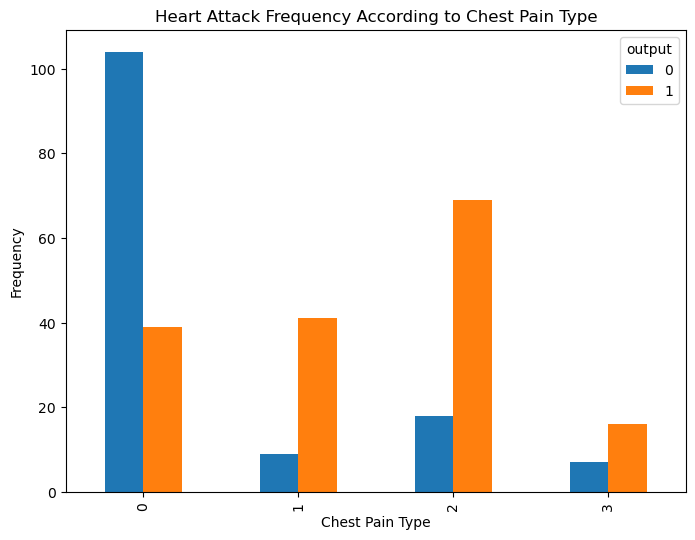

In [21]:
# Display chest pain types based on the target
pd.crosstab(heartdata.cp,heartdata.output).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Attack Frequency According to Chest Pain Type')
plt.xlabel('Chest Pain Type')
ax.bar(x = ['typical angina', 'atypical angina', 'non-anginal pain','asymptomatic'], height = [ta, aa, np, a])
plt.ylabel('Frequency')
plt.show()

## Blood Pressure Exploration

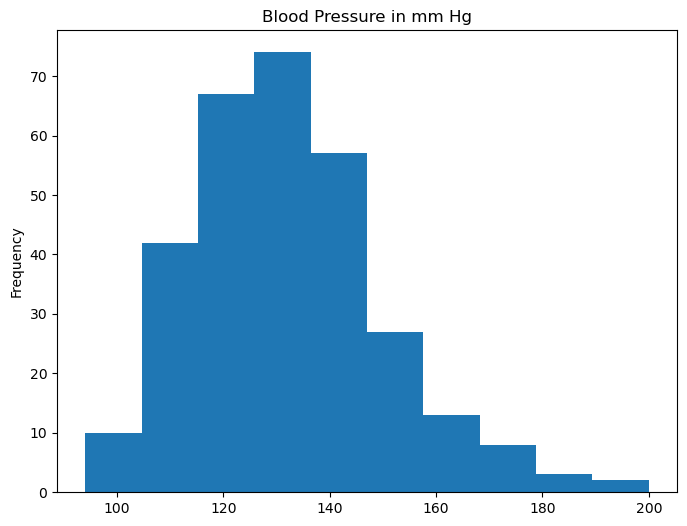

In [22]:
# Display blood pressure distribution
heartdata['trtbps'].plot(kind = 'hist', title = 'Blood Pressure in mm Hg', figsize = (8, 6))
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4532\1103506432.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\ASUS\AppData\Local\Temp\ipykernel_4532\1103506432.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




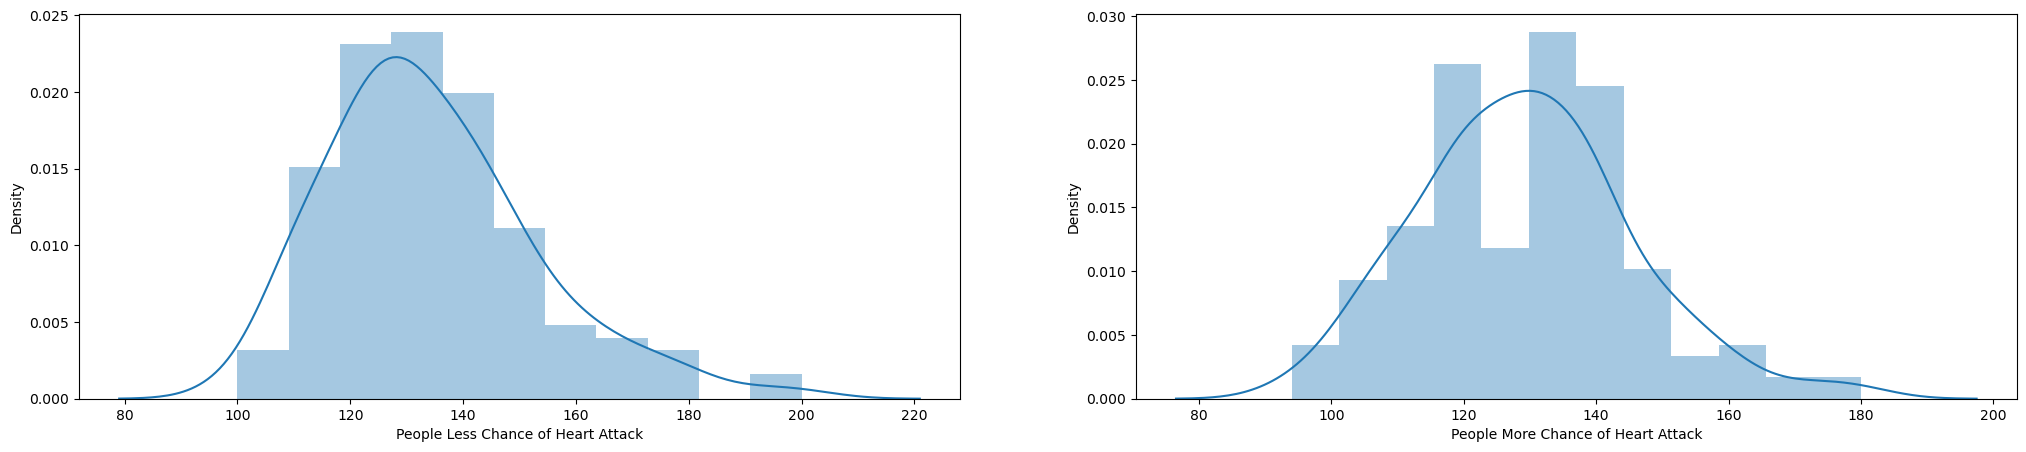

In [23]:
# Display blood pressure distribution based on heart attack
fig, (axis1, axis2) = plt.subplots(1, 2,figsize=(25, 5))
ax = sns.distplot(heartdata[heartdata['output'] == 0]['trtbps'], label='Less chance of heart attack', ax = axis1)
ax.set(xlabel='People Less Chance of Heart Attack')
ax = sns.distplot(heartdata[heartdata['output'] == 1]['trtbps'], label = 'More chance of heart attack', ax = axis2)
ax.set(xlabel='People More Chance of Heart Attack')
plt.show()

In [24]:
# Get min, max and average of the  blood pressure of the less chance of heart attack
print('Min blood pressure of people who less chance of heart attack: ', min(heartdata[heartdata['output'] == 0]['trtbps']))
print('Max blood pressure of people who less chance of heart attack: ', max(heartdata[heartdata['output'] == 0]['trtbps']))
print('Average blood pressure of people who less chance of heart attack: ', heartdata[heartdata['output'] == 0]['trtbps'].mean())

Min blood pressure of people who less chance of heart attack:  100
Max blood pressure of people who less chance of heart attack:  200
Average blood pressure of people who less chance of heart attack:  134.3985507246377


In [26]:
# Get min, max and average of the blood pressure of the people more chance of heart attack
print('Min blood pressure of people who more chance of heart attack: ', min(heartdata[heartdata['output'] == 1]['trtbps']))
print('Max blood pressure of people who more chance of heart attack: ', max(heartdata[heartdata['output'] == 1]['trtbps']))
print('Average blood pressure of people who more chance of heart attack: ', heartdata[heartdata['output'] == 1]['trtbps'].mean())

Min blood pressure of people who more chance of heart attack:  94
Max blood pressure of people who more chance of heart attack:  180
Average blood pressure of people who more chance of heart attack:  129.3030303030303


## Cholestoral Exploration

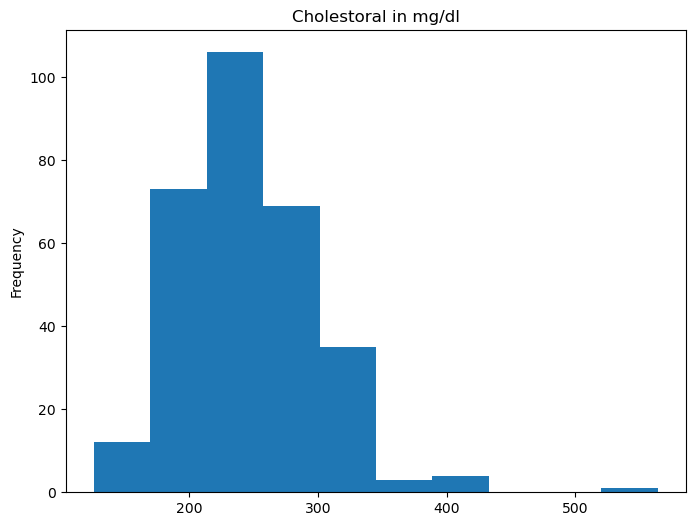

In [25]:
# Display Cholestoral distribution
heartdata['chol'].plot(kind = 'hist', title = 'Cholestoral in mg/dl', figsize = (8, 6))
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4532\3672353487.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\ASUS\AppData\Local\Temp\ipykernel_4532\3672353487.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




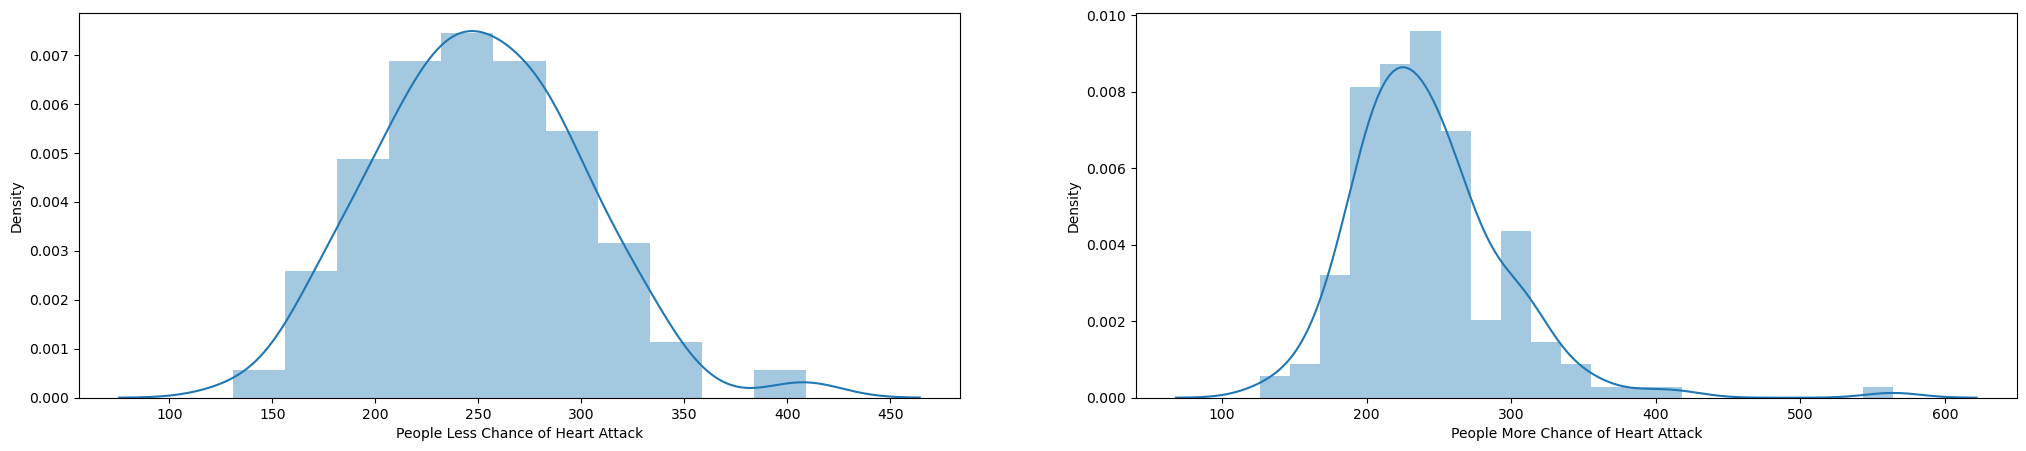

In [26]:
# Display Cholestoral distribution based on heart disease
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))
ax = sns.distplot(heartdata[heartdata['output'] == 0]['chol'], label='Less chance of heart attack', ax = axis1)
ax.set(xlabel='People Less Chance of Heart Attack')
ax = sns.distplot(heartdata[heartdata['output'] == 1]['chol'], label = 'More chance of heart attack', ax = axis2)
ax.set(xlabel='People More Chance of Heart Attack')
plt.show()

In [27]:
# Get min, max and average of the Cholestoral of the people less chance of heart attack
print('Min blood pressure of people who less chance of heart attack: ', min(heartdata[heartdata['output'] == 0]['chol']))
print('Max blood pressure of people who less chance of heart attack: ', max(heartdata[heartdata['output'] == 0]['chol']))
print('Average blood pressure of people who less chance of heart attack: ', heartdata[heartdata['output'] == 0]['chol'].mean())

Min blood pressure of people who less chance of heart attack:  131
Max blood pressure of people who less chance of heart attack:  409
Average blood pressure of people who less chance of heart attack:  251.08695652173913


In [28]:
heartdata# Get min, max and average of the Cholestoral of the people more chance of heart attack
print('Min blood pressure of people who more chance of heart attack: ', min(heartdata[heartdata['output'] == 1]['chol']))
print('Max blood pressure of people who more chance of heart attack: ', max(heartdata[heartdata['output'] == 1]['chol']))
print('Average blood pressure of people who more chance of heart attack: ', heartdata[heartdata['output'] == 1]['chol'].mean())

Min blood pressure of people who more chance of heart attack:  126
Max blood pressure of people who more chance of heart attack:  564
Average blood pressure of people who more chance of heart attack:  242.23030303030302


## Fasting Blood Sugar Exploration

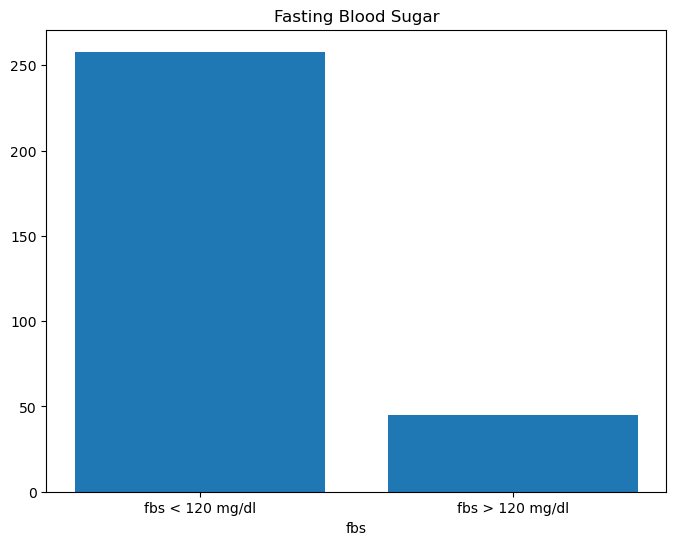

In [29]:
F = heartdata[heartdata['fbs'] == 0].count()['output']
T = heartdata[heartdata['fbs'] == 1].count()['output']


# Create a plot
figure, ax = plt.subplots(figsize = (8, 6))
ax.bar(x = ['fbs < 120 mg/dl', 'fbs > 120 mg/dl'], height = [F, T])
plt.xlabel('fbs')
plt.title('Fasting Blood Sugar')
plt.show()

# # Display fasting blood sugar in bar chart
# heartdata.groupby(heartdata['fbs']).count()['output'].plot(kind = 'bar', title = 'Fasting Blood Sugar', figsize = (8, 6))
# plt.xticks(np.arange(2), ('fbs < 120 mg/dl', 'fbs > 120 mg/dl'), rotation = 0)
# plt.show()

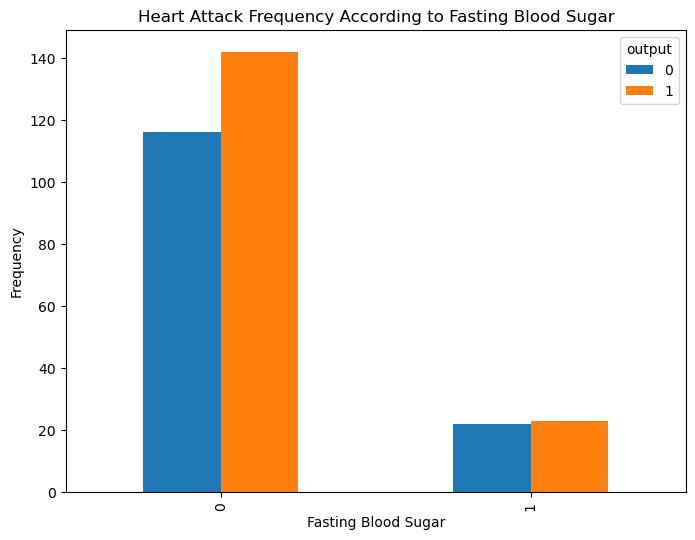

In [30]:
# Display fasting blood sugar based on the target
pd.crosstab(heartdata.fbs,heartdata.output).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Attack Frequency According to Fasting Blood Sugar')
plt.xlabel('Fasting Blood Sugar')
ax.bar(x = ['fbs < 120 mg/dl', 'fbs > 120 mg/dl'], height = [F, T])
plt.ylabel('Frequency')
plt.show()

## Electrocardiographic Results Exploration

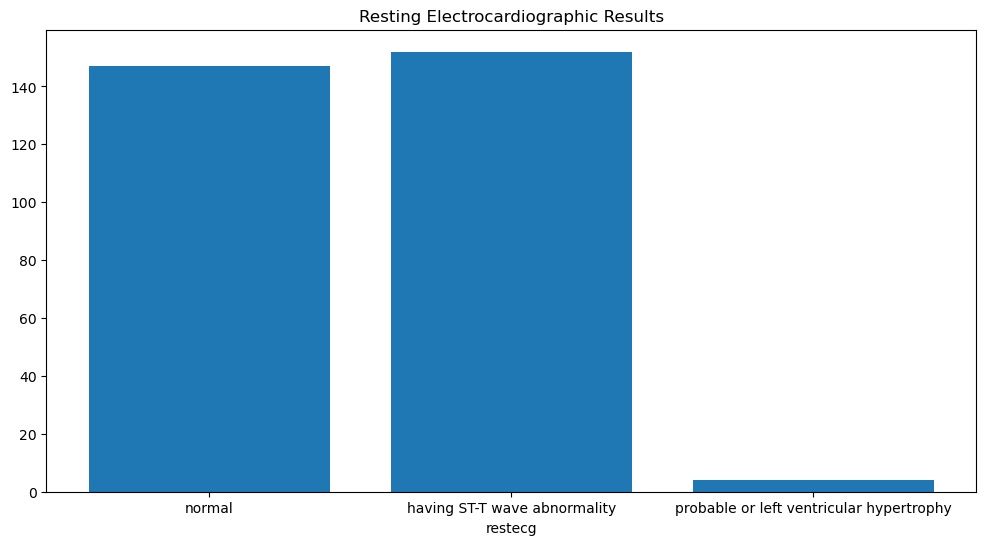

In [31]:
n = heartdata[heartdata['restecg'] == 0].count()['output']
hst = heartdata[heartdata['restecg'] == 1].count()['output']
p = heartdata[heartdata['restecg'] == 2].count()['output']

# Create a plot
figure, ax = plt.subplots(figsize = (12, 6))
ax.bar(x = ['normal', 'having ST-T wave abnormality', 'probable or left ventricular hypertrophy'], height = [n, hst, p])
plt.xlabel('restecg')
plt.title('Resting Electrocardiographic Results')
plt.show()

# # Display electrocardiographic results in bar chart
# heartdata.groupby(heartdata['restecg']).count()['output'].plot(kind = 'bar', title = 'Resting Electrocardiographic Results', figsize = (8, 6))
# plt.xticks(np.arange(3), ('normal', 'ST-T wave abnormality', ''))
# plt.show()

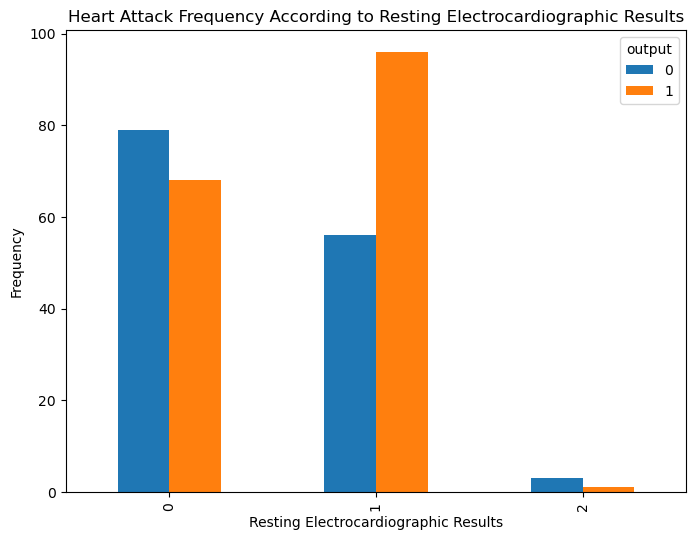

In [32]:
# Display resting electrocardiographic results based on the target
pd.crosstab(heartdata.restecg,heartdata.output).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Attack Frequency According to Resting Electrocardiographic Results')
ax.bar(x = ['normal', 'having ST-T wave abnormality', 'probable or left ventricular hypertrophy'], height = [n, hst, p])
plt.xlabel('Resting Electrocardiographic Results')
plt.ylabel('Frequency')
plt.show()

## Maximum Heart Rate Exploration

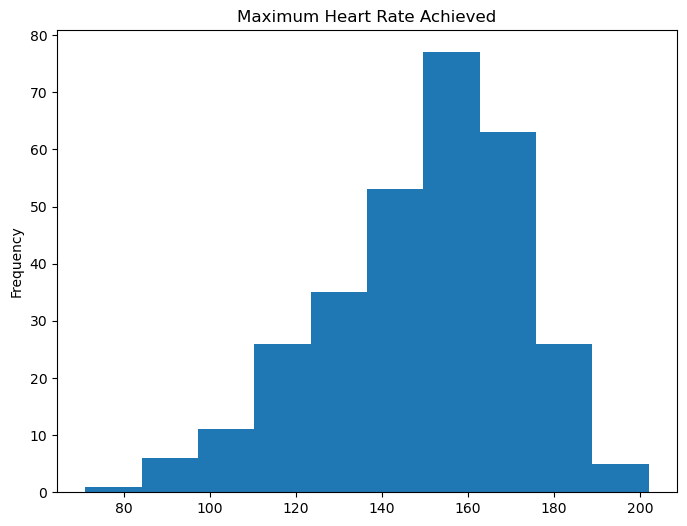

In [33]:
# Display maximum heart rate distribution
heartdata['thalachh'].plot(kind = 'hist', title = 'Maximum Heart Rate Achieved', figsize = (8, 6))
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4532\2315689232.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\ASUS\AppData\Local\Temp\ipykernel_4532\2315689232.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




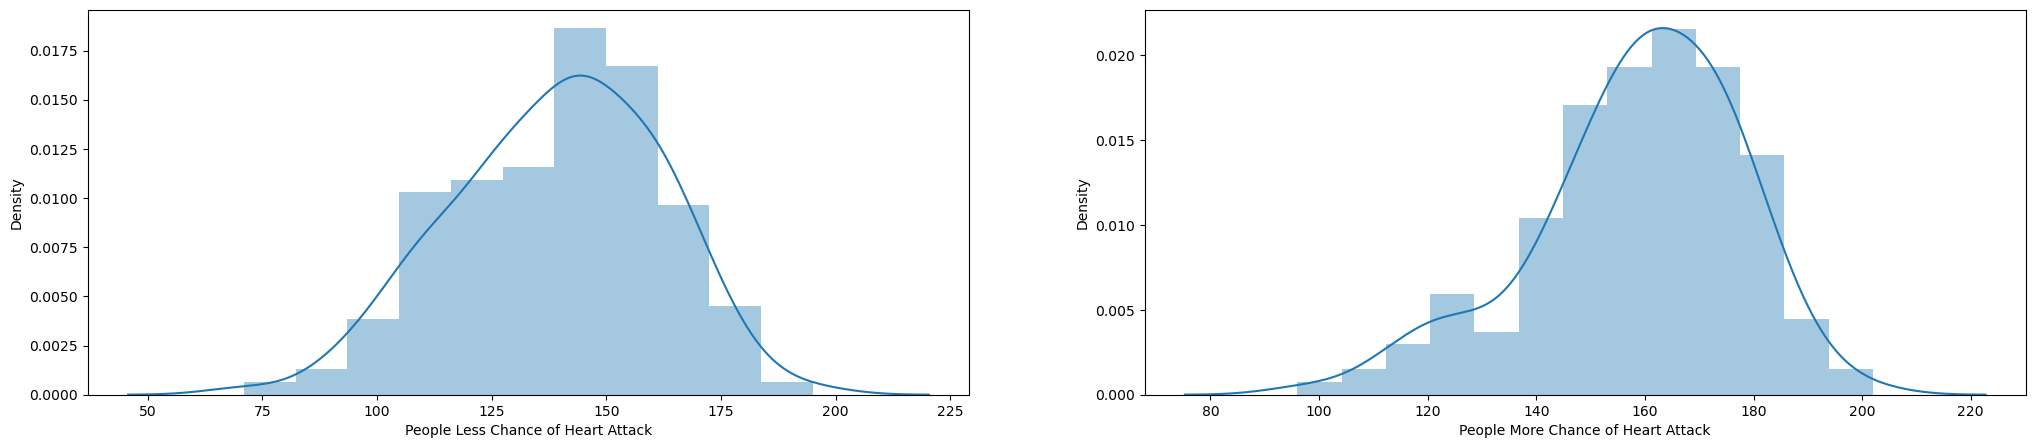

In [34]:
# Display maximum heart rate distribution based on heart attack
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))
ax = sns.distplot(heartdata[heartdata['output'] == 0]['thalachh'], label='Less chance of heart attack', ax = axis1)
ax.set(xlabel = 'People Less Chance of Heart Attack')
ax = sns.distplot(heartdata[heartdata['output'] == 1]['thalachh'], label = 'More chance of heart attack', ax = axis2)
ax.set(xlabel = 'People More Chance of Heart Attack')
plt.show()

In [35]:
# Get min, max and average of the maximum heart rate of the people less chance of heart attack
print('Min blood pressure of people who less chance of heart attack: ', min(heartdata[heartdata['output'] == 0]['thalachh']))
print('Max blood pressure of people who less chance of heart attack: ', max(heartdata[heartdata['output'] == 0]['thalachh']))
print('Average blood pressure of people who less chance of heart attack: ', heartdata[heartdata['output'] == 0]['thalachh'].mean())

Min blood pressure of people who less chance of heart attack:  71
Max blood pressure of people who less chance of heart attack:  195
Average blood pressure of people who less chance of heart attack:  139.1014492753623


In [36]:
# Get min, max and average of the maximum heart rate of the people more chance of heart attack
print('Min blood pressure of people who more chance of heart attack: ', min(heartdata[heartdata['output'] == 1]['thalachh']))
print('Max blood pressure of people who more chance of heart attack: ', max(heartdata[heartdata['output'] == 1]['thalachh']))
print('Average blood pressure of people who more chance of heart attack: ', heartdata[heartdata['output'] == 1]['thalachh'].mean())

Min blood pressure of people who more chance of heart attack:  96
Max blood pressure of people who more chance of heart attack:  202
Average blood pressure of people who more chance of heart attack:  158.46666666666667


## Exercise Induced Angina Exploration

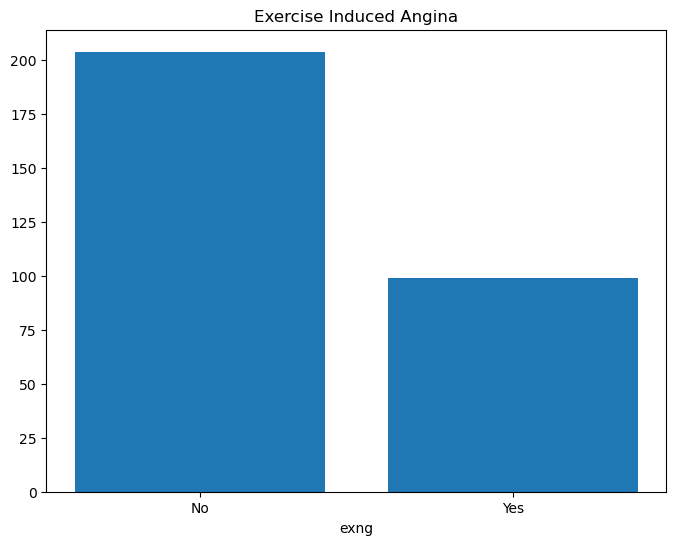

In [37]:
N = heartdata[heartdata['exng'] == 0].count()['output']
Y = heartdata[heartdata['exng'] == 1].count()['output']

# Create a plot
figure, ax = plt.subplots(figsize = (8, 6))
ax.bar(x = ['No', 'Yes'], height = [N, Y])
plt.xlabel('exng')
plt.title('Exercise Induced Angina')
plt.show()

# # Display exercise induced angina in bar chart
# heartdata.groupby(heartdata['exng']).count()['output'].plot(kind = 'bar', title = 'Exercise Induced Angina',  figsize = (8, 6))
# plt.xticks(np.arange(2), ('No', 'Yes'), rotation = 0)
# plt.show()

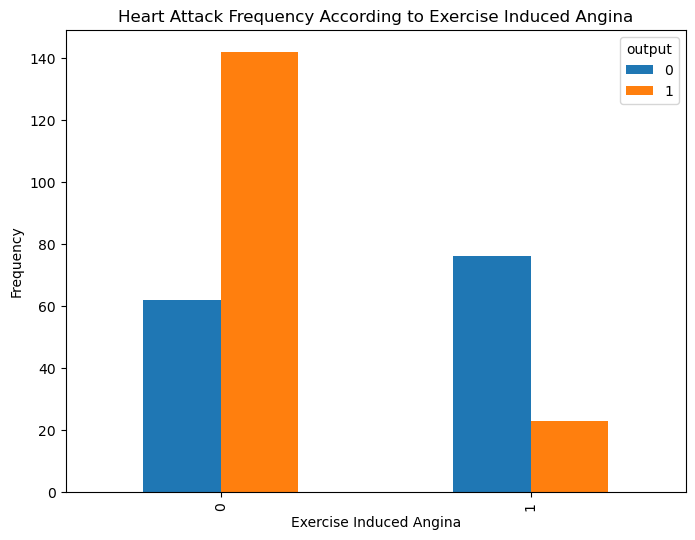

In [38]:
# Display exercise induced angina based on the output
pd.crosstab(heartdata.exng,heartdata.output).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Attack Frequency According to Exercise Induced Angina')
plt.xlabel('Exercise Induced Angina')
ax.bar(x = ['No', 'Yes'], height = [N, Y])
plt.ylabel('Frequency')
plt.show()

## ST Depression Exploration

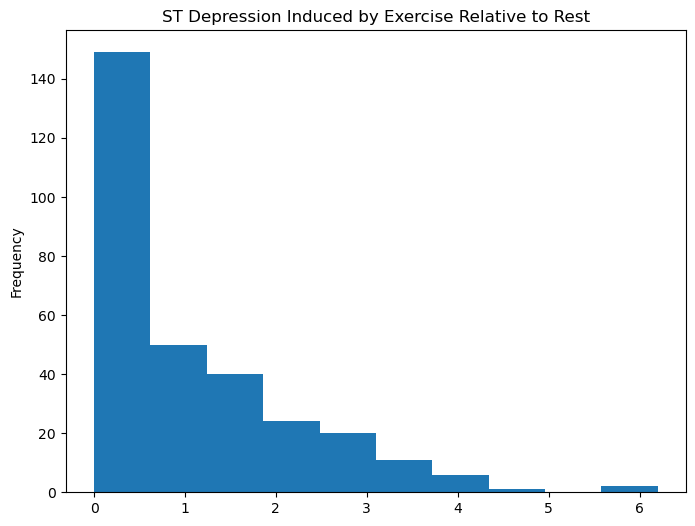

In [39]:
# Display ST depression induced by exercise relative to rest distribution
heartdata['oldpeak'].plot(kind = 'hist', title = 'ST Depression Induced by Exercise Relative to Rest', figsize = (8, 6))
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_4532\3002900629.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\ASUS\AppData\Local\Temp\ipykernel_4532\3002900629.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




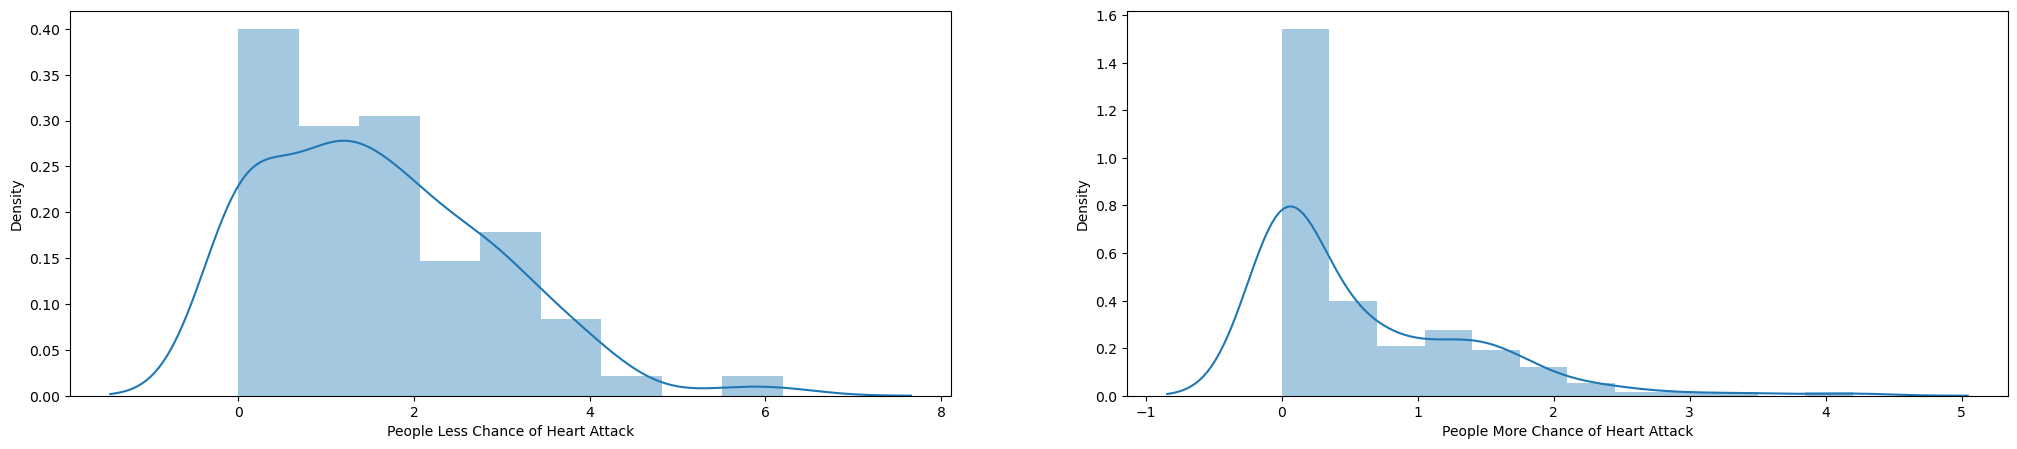

In [40]:
# Display ST depression distribution based on heart disease
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(25, 5))
ax = sns.distplot(heartdata[heartdata['output'] == 0]['oldpeak'], label='Less chance of heart attack', ax = axis1)
ax.set(xlabel = 'People Less Chance of Heart Attack')
ax = sns.distplot(heartdata[heartdata['output'] == 1]['oldpeak'], label = 'More chance of heart attack', ax = axis2)
ax.set(xlabel = 'People More Chance of Heart Attack')
plt.show()

In [41]:
# Get min, max and average of the ST depression of the people less chance of heart attack
print('Min blood pressure of people who less chance of heart attack: ', min(heartdata[heartdata['output'] == 0]['oldpeak']))
print('Max blood pressure of people who less chance of heart attack: ', max(heartdata[heartdata['output'] == 0]['oldpeak']))
print('Average blood pressure of people who less chance of heart attack: ', heartdata[heartdata['output'] == 0]['oldpeak'].mean())

Min blood pressure of people who less chance of heart attack:  0.0
Max blood pressure of people who less chance of heart attack:  6.2
Average blood pressure of people who less chance of heart attack:  1.5855072463768116


In [42]:
heartdata# Get min, max and average of the ST depression of the people more chance of heart attack
print('Min blood pressure of people who more chance of heart attack: ', min(heartdata[heartdata['output'] == 1]['oldpeak']))
print('Max blood pressure of people who more chance of heart attack: ', max(heartdata[heartdata['output'] == 1]['oldpeak']))
print('Average blood pressure of people who more chance of heart attack: ', heartdata[heartdata['output'] == 1]['oldpeak'].mean())

Min blood pressure of people who more chance of heart attack:  0.0
Max blood pressure of people who more chance of heart attack:  4.2
Average blood pressure of people who more chance of heart attack:  0.583030303030303


## Slope Exploration

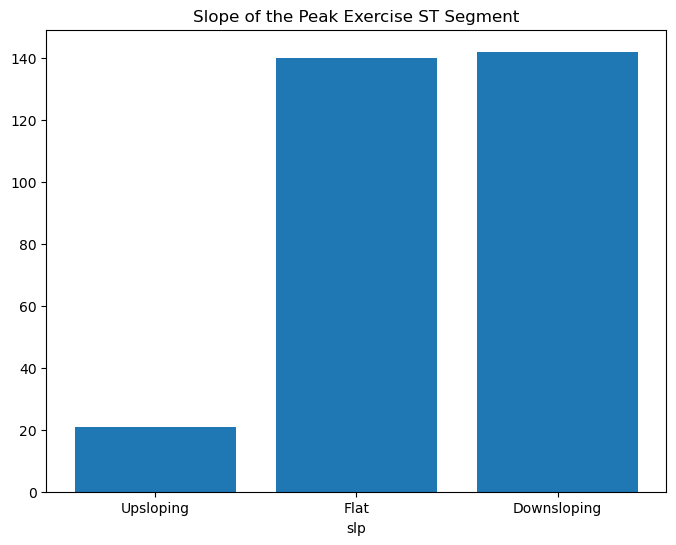

In [43]:
U = heartdata[heartdata['slp'] == 0].count()['output']
F = heartdata[heartdata['slp'] == 1].count()['output']
D = heartdata[heartdata['slp'] == 2].count()['output']

# Create a plot
figure, ax = plt.subplots(figsize = (8, 6))
ax.bar(x = ['Upsloping', 'Flat', 'Downsloping'], height = [U, F, D])
plt.xlabel('slp')
plt.title('Slope of the Peak Exercise ST Segment')
plt.show()

# # Display slope of the peak exercise ST segment in bar chart
# heartdata.groupby(heartdata['slp']).count()['output'].plot(kind = 'bar', title = 'Slope of the Peak Exercise ST Segment', figsize = (8, 6))
# plt.xticks(np.arange(3), ('upsloping', 'flat', 'downsloping'), rotation = 0)
# plt.show()

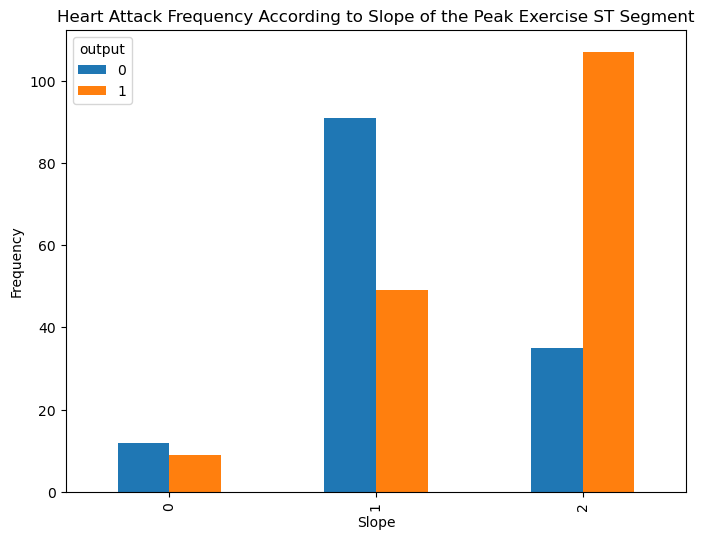

In [44]:
# Display slope of the peak exercise ST segment based on the target
pd.crosstab(heartdata.slp,heartdata.output).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Attack Frequency According to Slope of the Peak Exercise ST Segment')
plt.xlabel('Slope')
ax.bar(x = ['Upsloping', 'Flat', 'Downsloping'], height = [U, F, D])
plt.ylabel('Frequency')
plt.show()

## Major Vessels Exploration

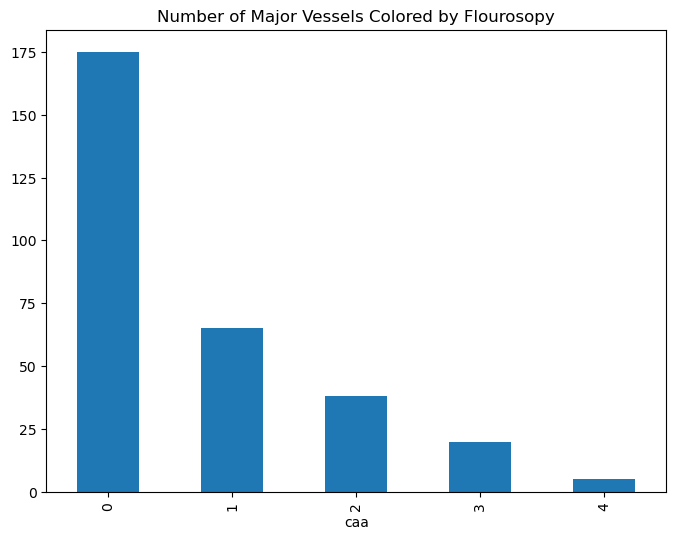

In [45]:
# Display number of major vessels in bar chart
heartdata.groupby(heartdata['caa']).count()['output'].plot(kind = 'bar', title = 'Number of Major Vessels Colored by Flourosopy', figsize = (8, 6))
plt.show()

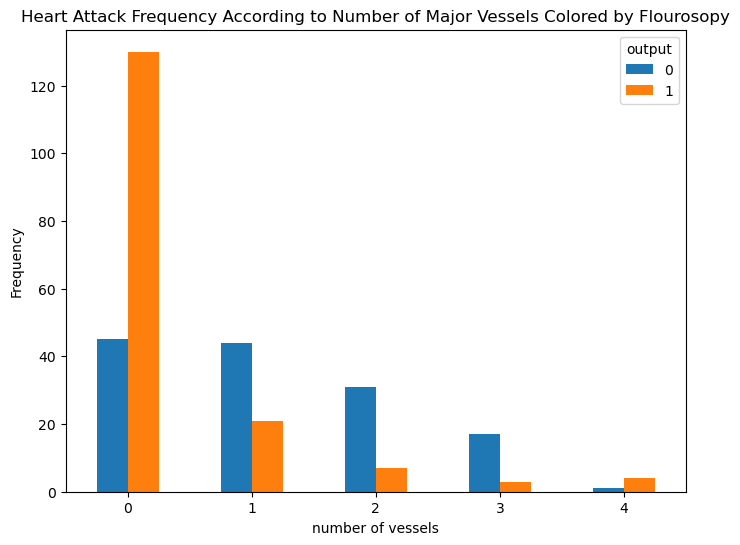

In [46]:
# Display number of vessels based on the target
pd.crosstab(heartdata.caa,heartdata.output).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Attack Frequency According to Number of Major Vessels Colored by Flourosopy')
plt.xlabel('number of vessels')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

## Thalassemia Exploration

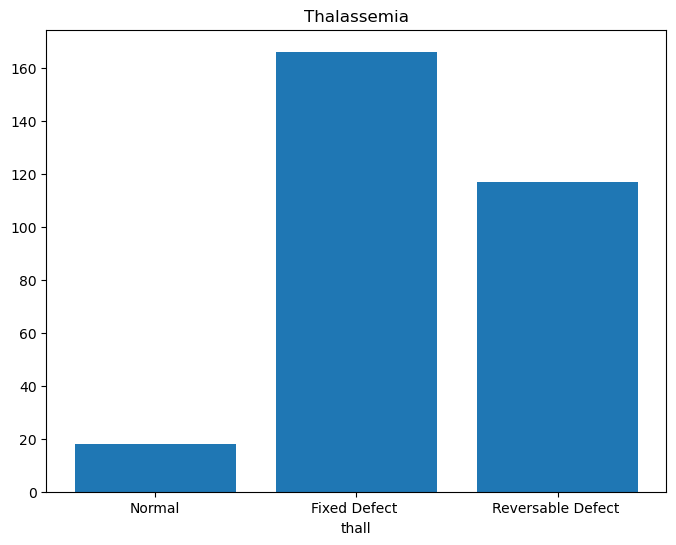

In [47]:
N = heartdata[heartdata['thall'] == 1].count()['output']
F = heartdata[heartdata['thall'] == 2].count()['output']
R = heartdata[heartdata['thall'] == 3].count()['output']

# Create a plot
figure, ax = plt.subplots(figsize = (8, 6))
ax.bar(x = ['Normal', 'Fixed Defect ', 'Reversable Defect '], height = [N, F, R])
plt.xlabel('thall')
plt.title('Thalassemia')
plt.show()

# # Display thalassemia in bar chart
# heartdata.groupby(heartdata['thall']).count()['output'].plot(kind = 'bar', title = 'Thalassemia')
# plt.xticks(np.arange(3), ('normal', 'fixed defect', 'reversible defect'), rotation = 0)
# plt.show()

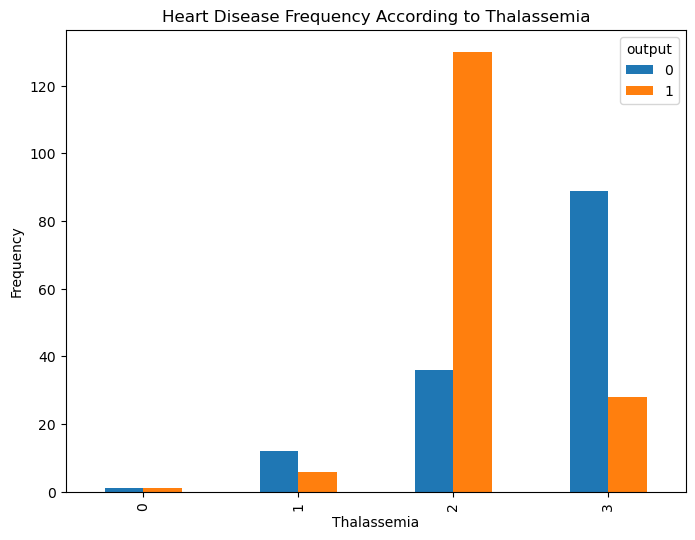

In [48]:
pd.crosstab(heartdata.thall,heartdata.output).plot(kind = "bar", figsize = (8, 6))
plt.title('Heart Disease Frequency According to Thalassemia')
plt.xlabel('Thalassemia')
ax.bar(x = ['Normal', 'Fixed Defect ', 'Reversable Defect '], height = [N, F, R])
plt.ylabel('Frequency')
plt.show()

##    The correlation between heart attack, cp and exang

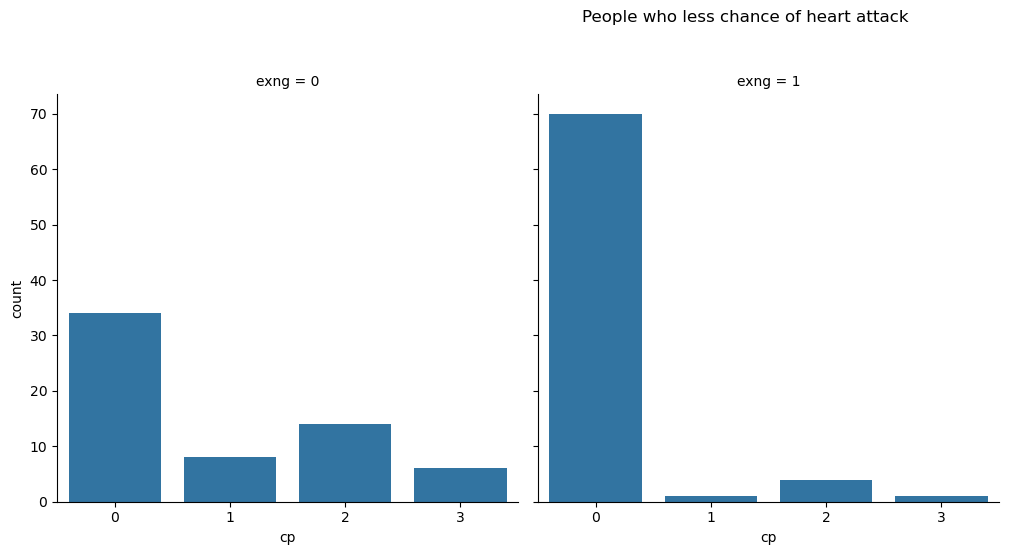

In [49]:
heartdata_terfilter = heartdata[heartdata['output'] == 0]

g = sns.catplot(x="cp", col="exng", col_wrap=3, data=heartdata_terfilter, kind="count")
ax.bar(x = ['typical angina', 'atypical angina', 'non-anginal pain','asymptomatic'], height = [ta, aa, np, a])
g.fig.suptitle('People who less chance of heart attack', y=1.1)
plt.show()

## The correlation between oldpeak, slope and output


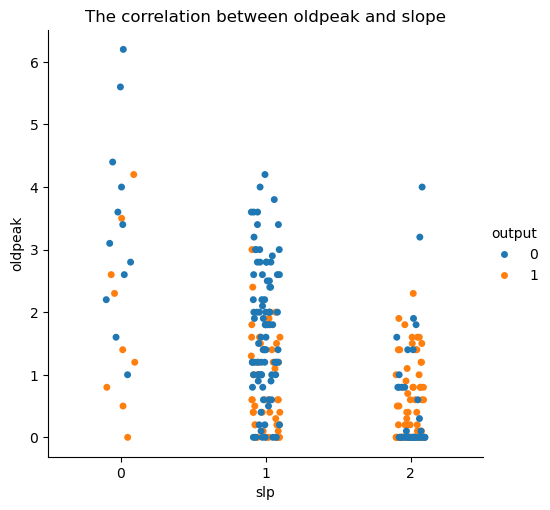

In [50]:
sns.catplot(x = "slp", y = "oldpeak", hue = "output", data = heartdata)
plt.title('The correlation between oldpeak and slope')
ax.bar(x = ['Upsloping', 'Flat', 'Downsloping'], height = [U, F, D])
plt.show()

## The correlation between ca and age

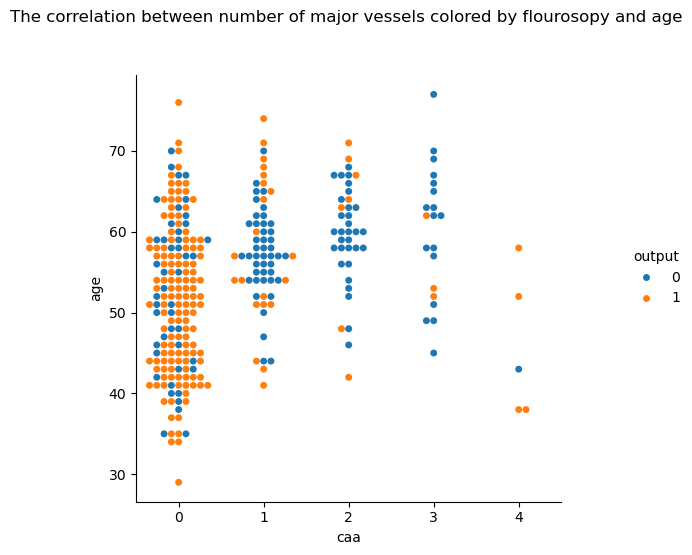

In [53]:
g = sns.catplot(x = 'caa', y = 'age', hue = 'output', data = heartdata, kind="swarm")
g.fig.suptitle('The correlation between number of major vessels colored by flourosopy and age', y = 1.1)
plt.show()

## The correlation between age and thalach

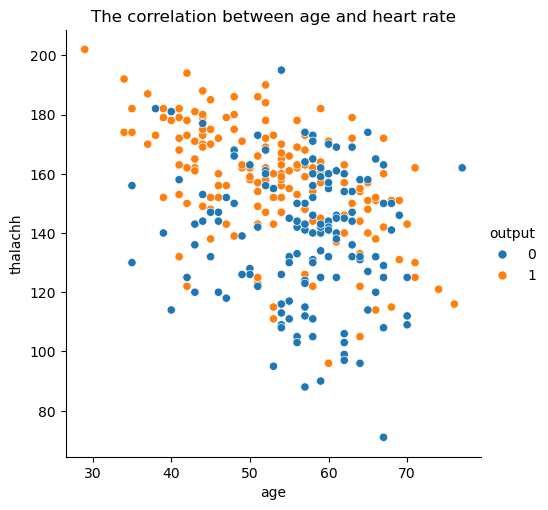

In [54]:
sns.relplot(x = 'age', y = 'thalachh', data = heartdata, hue = 'output', legend="full")
plt.title('The correlation between age and heart rate')
plt.show()

## Modeling

#### Prepare Data for Machine Learning

In [55]:
# Initialize data and target
target = heartdata['output']
features = heartdata.drop(['output'], axis = 1)

In [56]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 0)

#### Train and Evaluate Models

In [57]:
# Train and evaluate model
def fit_eval_model(model, train_features, y_train, test_features, y_test):
    
    """
    Function: train and evaluate a machine learning classifier.
    Args:
      model: machine learning classifier
      train_features: train data extracted features
      y_train: train data lables
      test_features: train data extracted features
      y_test: train data lables
    Return:
      results(dictionary): a dictionary of classification report
    """
    results = {}
    
    # Train the model
    model.fit(train_features, y_train)
    
    # Test the model
    train_predicted = model.predict(train_features)
    test_predicted = model.predict(test_features)
    
     # Classification report and Confusion Matrix
    results['classification_report'] = classification_report(y_test, test_predicted)
    results['confusion_matrix'] = confusion_matrix(y_test, test_predicted)
        
    return results
    

In [58]:
# Initialize the models
nb = GaussianNB()

# Fit and evaluate models
results = {}
for cls in [nb]:
    cls_name = cls.__class__.__name__
    results[cls_name] = {}
    results[cls_name] = fit_eval_model(cls, X_train, y_train, X_test, y_test)
    

In [59]:
# Print classifiers results
for result in results:
    print (result)
    print()
    for i in results[result]:
        print (i, ':')
        print(results[result][i])
        print()
    print ('-----')
    print()

GaussianNB

classification_report :
              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.84      0.91      0.87        34

    accuracy                           0.85        61
   macro avg       0.86      0.84      0.85        61
weighted avg       0.85      0.85      0.85        61


confusion_matrix :
[[21  6]
 [ 3 31]]

-----



In [60]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 0)

In [61]:
# Train and evaluate model
def fit_eval_model(model, train_features, y_train, test_features, y_test):
    
    """
    Function: train and evaluate a machine learning classifier.
    Args:
      model: machine learning classifier
      train_features: train data extracted features
      y_train: train data lables
      test_features: train data extracted features
      y_test: train data lables
    Return:
      results(dictionary): a dictionary of classification report
    """
    results = {}
    
    # Train the model
    model.fit(train_features, y_train)
    
    # Test the model
    train_predicted = model.predict(train_features)
    test_predicted = model.predict(test_features)
    
     # Classification report and Confusion Matrix
    results['classification_report'] = classification_report(y_test, test_predicted)
    results['confusion_matrix'] = confusion_matrix(y_test, test_predicted)
        
    return results
    

In [62]:
# Initialize the models
nb = GaussianNB()

# Fit and evaluate models
results = {}
for cls in [nb]:
    cls_name = cls.__class__.__name__
    results[cls_name] = {}
    results[cls_name] = fit_eval_model(cls, X_train, y_train, X_test, y_test)

In [63]:
# Print classifiers results
for result in results:
    print (result)
    print()
    for i in results[result]:
        print (i, ':')
        print(results[result][i])
        print()
    print ('-----')
    print()

GaussianNB

classification_report :
              precision    recall  f1-score   support

           0       0.84      0.73      0.78        44
           1       0.77      0.87      0.82        47

    accuracy                           0.80        91
   macro avg       0.81      0.80      0.80        91
weighted avg       0.81      0.80      0.80        91


confusion_matrix :
[[32 12]
 [ 6 41]]

-----



In [72]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.4, random_state = 0)

In [73]:
# Train and evaluate model
def fit_eval_model(model, train_features, y_train, test_features, y_test):
    
    """
    Function: train and evaluate a machine learning classifier.
    Args:
      model: machine learning classifier
      train_features: train data extracted features
      y_train: train data lables
      test_features: train data extracted features
      y_test: train data lables
    Return:
      results(dictionary): a dictionary of classification report
    """
    results = {}
    
    # Train the model
    model.fit(train_features, y_train)
    
    # Test the model
    train_predicted = model.predict(train_features)
    test_predicted = model.predict(test_features)
    
     # Classification report and Confusion Matrix
    results['classification_report'] = classification_report(y_test, test_predicted)
    results['confusion_matrix'] = confusion_matrix(y_test, test_predicted)
        
    return results
    

In [74]:
# Initialize the models
nb = GaussianNB()

# Fit and evaluate models
results = {}
for cls in [nb]:
    cls_name = cls.__class__.__name__
    results[cls_name] = {}
    results[cls_name] = fit_eval_model(cls, X_train, y_train, X_test, y_test)

In [75]:
# Print classifiers results
for result in results:
    print (result)
    print()
    for i in results[result]:
        print (i, ':')
        print(results[result][i])
        print()
    print ('-----')
    print()

GaussianNB

classification_report :
              precision    recall  f1-score   support

           0       0.83      0.73      0.77        59
           1       0.77      0.86      0.81        63

    accuracy                           0.80       122
   macro avg       0.80      0.79      0.79       122
weighted avg       0.80      0.80      0.79       122


confusion_matrix :
[[43 16]
 [ 9 54]]

-----



#### Save Model

In [76]:
# Save the model as serialized object pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(nb, file)